+ Assignment1

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

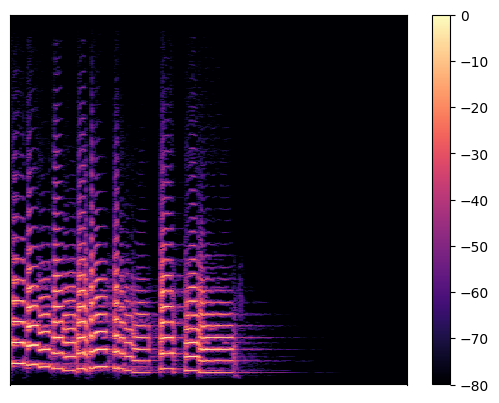

In [5]:
y, sr = librosa.load(librosa.ex('trumpet'))
D = librosa.stft(y) # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

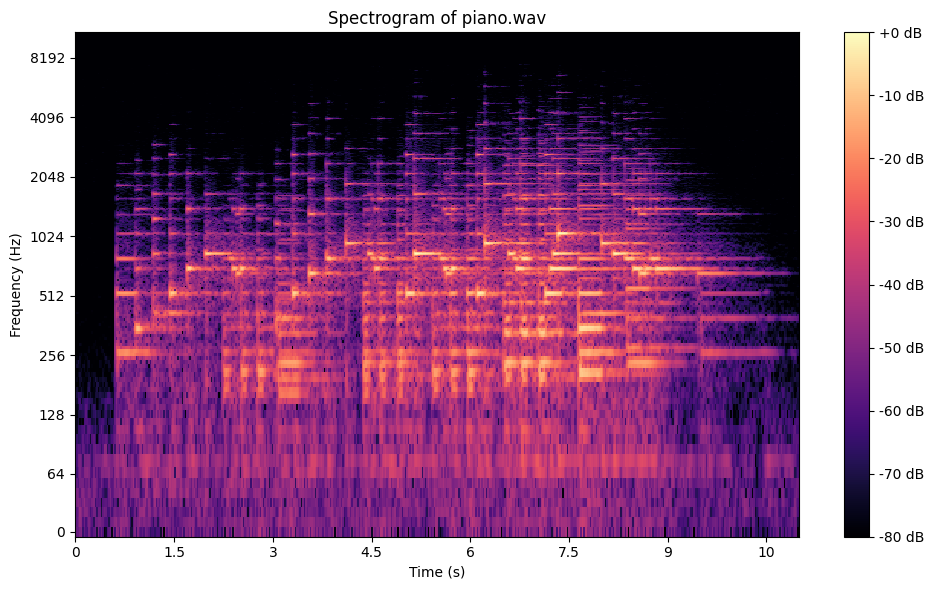

In [6]:
y, sr = librosa.load('audio_data/piano.wav')

D = librosa.stft(y)

S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of piano.wav')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


+ Assignment2

In [9]:
y, sr = librosa.load('audio_data/piano.wav', sr=16000)  

# Parameters
n_fft = 512  # Window size
hop_length = 512  # Hop size (non-overlapping windows)
num_bands = 8  # Number of frequency bands
bands = [(i * 1000, (i + 1) * 1000) for i in range(num_bands)]  # [0-1kHz), [1-2kHz), ..., [7-8kHz)

# Perform STFT
D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

# Get frequencies corresponding to each FFT bin
frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

# Create a function to calculate the energy in each frequency band
def calculate_band_energy(D, frequencies, bands):
    band_energies = []
    for band in bands:
        band_min, band_max = band
        # Find indices for the current band
        band_indices = np.where((frequencies >= band_min) & (frequencies < band_max))[0]
        # Sum the energy in the frequency range for each frame (column of D)
        band_energy = np.sum(D[band_indices, :]**2, axis=0)
        band_energies.append(band_energy)
    return np.array(band_energies)

# Calculate energies for each frequency band in each window
band_energies = calculate_band_energy(D, frequencies, bands)

# Transpose the result to get an 8-dimensional vector for each window
energy_vectors = band_energies.T

output_file = 'piano_energies.txt'
np.savetxt(output_file, energy_vectors)

print(f'Energies saved successfully')

Energies saved successfully


In [12]:
y, sr = librosa.load('audio_data/piano.wav', sr=16000)  

n_fft = 512  # Window size of 512 samples (~32ms per window)
hop_length = 512  # Non-overlapping windows for clarity in pitch tendencies
num_bands = 8  # Number of frequency bands
bands = [(i * 1000, (i + 1) * 1000) for i in range(num_bands)] 

# Perform STFT
D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

# Get frequencies corresponding to each FFT bin
frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

# Function to calculate energy in each frequency band
def calculate_band_energy(D, frequencies, bands):
    band_energies = []
    for band in bands:
        band_min, band_max = band
        # Find indices for the current band
        band_indices = np.where((frequencies >= band_min) & (frequencies < band_max))[0]
        # Sum the energy in the frequency range for each frame (column of D)
        band_energy = np.sum(D[band_indices, :]**2, axis=0)
        band_energies.append(band_energy)
    return np.array(band_energies)

# Calculate energies for each frequency band in each window
band_energies = calculate_band_energy(D, frequencies, bands)

# Transpose the result to get an 8-dimensional vector for each window
energy_vectors = band_energies.T

# Function to calculate Ci codes (U, D, Rx)
def calculate_pitch_tendencies(energy_vectors):
    pitch_codes = []
    repeat_count = 0
    
    # Find the max-energy band in the first window
    prev_max_band = np.argmax(energy_vectors[0])
    
    # Iterate through each window to compute Ci codes
    for i in range(1, len(energy_vectors)):
        # Find the max-energy band of the current window
        current_max_band = np.argmax(energy_vectors[i])
        
        if current_max_band > prev_max_band:
            pitch_codes.append("U")  # Up
            repeat_count = 0  # Reset repeat count
        elif current_max_band < prev_max_band:
            pitch_codes.append("D")  # Down
            repeat_count = 0  # Reset repeat count
        else:
            # If it's a repeat, increase the count
            repeat_count += 1
            pitch_codes.append(f"R{repeat_count}")  # Repeat-x
        
        # Update the previous max band
        prev_max_band = current_max_band
    
    return pitch_codes

# Calculate pitch tendencies
pitch_tendencies = calculate_pitch_tendencies(energy_vectors)

# Save the result to a text file
output_file = 'piano_pitch_tendencies.txt'
with open(output_file, 'w') as f:
    for code in pitch_tendencies:
        f.write(code + "\n")

print(f'Pitch tendencies saved successfully')

Pitch tendencies saved successfully
